In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import os
from glob import glob
from matplotlib import axes

In [2]:
!wget https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L220413094306E76C617947_SC00.fits
!wget https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L220413094306E76C617947_PH00.fits
!wget https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L220413094306E76C617947_PH01.fits
!wget https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L220413094306E76C617947_PH04.fits
!wget https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L220413094306E76C617947_PH07.fits
!wget https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L220413094306E76C617947_PH02.fits
!wget https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L220413094306E76C617947_PH08.fits
!wget https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L220413094306E76C617947_PH06.fits
!wget https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L220413094306E76C617947_PH05.fits
!wget https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L220413094306E76C617947_PH03.fits

--2022-11-08 10:31:51--  https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L220413094306E76C617947_SC00.fits
Resolving fermi.gsfc.nasa.gov (fermi.gsfc.nasa.gov)... 129.164.179.26, 2001:4d0:2310:150::26
Connecting to fermi.gsfc.nasa.gov (fermi.gsfc.nasa.gov)|129.164.179.26|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-11-08 10:31:51 ERROR 404: Not Found.

--2022-11-08 10:31:52--  https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L220413094306E76C617947_PH00.fits
Resolving fermi.gsfc.nasa.gov (fermi.gsfc.nasa.gov)... 129.164.179.26, 2001:4d0:2310:150::26
Connecting to fermi.gsfc.nasa.gov (fermi.gsfc.nasa.gov)|129.164.179.26|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-11-08 10:31:52 ERROR 404: Not Found.

--2022-11-08 10:31:52--  https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L220413094306E76C617947_PH01.fits
Resolving fermi.gsfc.nasa.gov (fermi.gsfc.nasa.gov)... 129.164.179.26, 2001:4d0:2310:150::26
Conne

Read photon files and make a dataframe

In [2]:
# read photon files
flist = glob("./data/txs/*PH*.fits")
print(flist)
RA = np.zeros(())
DEC = np.zeros(())
ENERGY = np.zeros(())
TIME = np.zeros(())
start_date = np.datetime64("2001-01-01")
for i in range(len(flist)):
    with fits.open(flist[i]) as f1:
        data = f1[1].data
        if i == 0:
            RA = data.RA
            DEC = data.DEC
            ENERGY = data.ENERGY
            TIME = data.TIME
        else:
            RA = np.concatenate((RA,data.RA))
            DEC = np.concatenate((DEC,data.DEC))
            ENERGY = np.concatenate((ENERGY,data.ENERGY))
            TIME = np.concatenate((TIME,data.TIME))
data = np.vstack((RA,DEC,ENERGY,TIME)).transpose()
df = pd.DataFrame(data, columns = ('RA', 'DEC', 'ENERGY', 'MET'))
df.insert(4, "TIME", 0)
df['TIME'] = pd.to_timedelta(df['MET'], unit = 's') + start_date

df
# df['TIME'].dtype

['./data/txs/L221108044435D3DDE47220_PH07.fits', './data/txs/L221108044435D3DDE47220_PH06.fits', './data/txs/L221108044435D3DDE47220_PH01.fits', './data/txs/L221108044435D3DDE47220_PH00.fits', './data/txs/L221108044435D3DDE47220_PH03.fits', './data/txs/L221108044435D3DDE47220_PH02.fits', './data/txs/L221108044435D3DDE47220_PH05.fits', './data/txs/L221108044435D3DDE47220_PH04.fits']


,RA,DEC,ENERGY,MET,TIME
0,78.356987,5.210845,1174.120728,5.869223e+08,2019-08-08 01:57:43.442677617
1,77.846130,0.735616,192.516800,5.869274e+08,2019-08-08 03:23:45.870005846
2,75.776581,1.722394,2273.555908,5.869275e+08,2019-08-08 03:25:31.220698357
3,77.668289,9.493636,103.768372,5.869332e+08,2019-08-08 04:59:23.871068120
4,76.406746,3.424422,287.644745,5.869335e+08,2019-08-08 05:04:16.547863245
...,...,...,...,...,...
643031,73.470886,6.790098,261.708771,4.900529e+08,2016-07-12 21:48:56.380403101
643032,75.311188,8.518250,129.910736,4.900634e+08,2016-07-13 00:43:18.734164715
643033,77.211746,10.681694,1364.952637,4.900763e+08,2016-07-13 04:18:09.777653039
643034,76.813393,10.196643,193.072403,4.901313e+08,2016-07-13 19:35:05.363986015


In [3]:
df['TIME'].min()

Timestamp('2008-08-04 15:43:52.524341403')

Perform basic event selection and aperture photometry for two blazars and plot a light-curve-like histogram

In [4]:
ntbins = int(((df['TIME'].max() - df['TIME'].min()) / np.timedelta64(1, 'M'))/3) #number of 3-month long intervals
print(ntbins)
RA_txs = 77.3542
DEC_txs = 5.7025
RA_pks = 76.3470
DEC_pks = 4.99500
r = 0.5
e_cut = 1000
sdf_txs = df.loc[lambda t: np.sqrt((t['RA'] - RA_txs)**2 + (t['DEC'] - DEC_txs)**2) < r]
sdf_pks = df.loc[lambda t: np.sqrt((t['RA'] - RA_pks)**2 + (t['DEC'] - DEC_pks)**2) < r]
sdf_txs = sdf_txs.loc[sdf_txs['ENERGY'] > e_cut]
sdf_pks = sdf_pks.loc[sdf_pks['ENERGY'] > e_cut]
arr_txs = np.array(sdf_txs['MET'])
arr_pks = np.array(sdf_pks['MET'])
# sdf

49


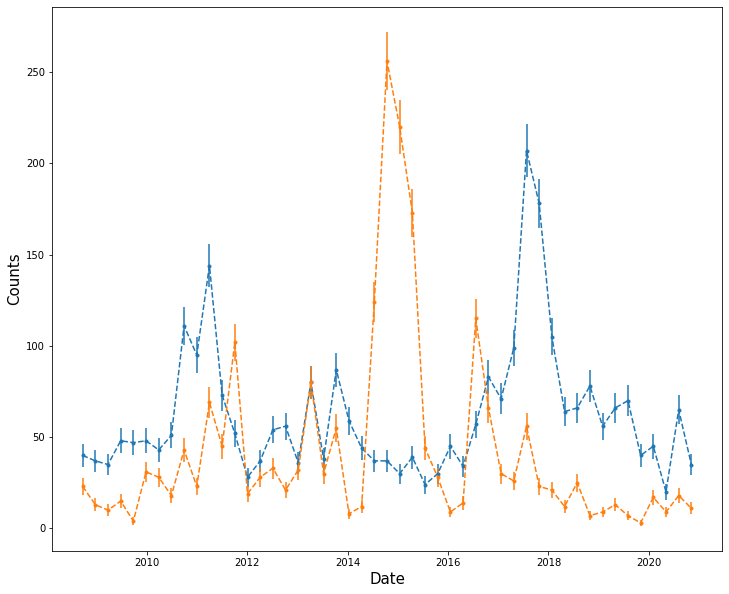

In [5]:
fig = plt.figure(figsize = (12,10))
ax = fig.gca()

y_txs, bin_edges, etc = plt.hist(arr_txs, alpha = 0.5, bins = ntbins)
y_pks, bin_edges, etc = plt.hist(arr_pks, alpha = 0.5, bins = ntbins)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Counts', fontsize=15)
fig.clear()

bin_centers = pd.to_timedelta(bin_edges[1:] - (bin_edges[1:] - bin_edges[:-1])/2, unit='s') + start_date

plt.errorbar(
    bin_centers,
    y_txs,
    yerr = y_txs**0.5,
    marker = '.',
    linestyle = '--'
)
plt.errorbar(
    bin_centers,
    y_pks,
    yerr = y_pks**0.5,
    marker = '.',
    linestyle = '--'
)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Counts', fontsize=15)
fig.canvas.draw()

Show the combined image for 12 years and sizes of containment angles

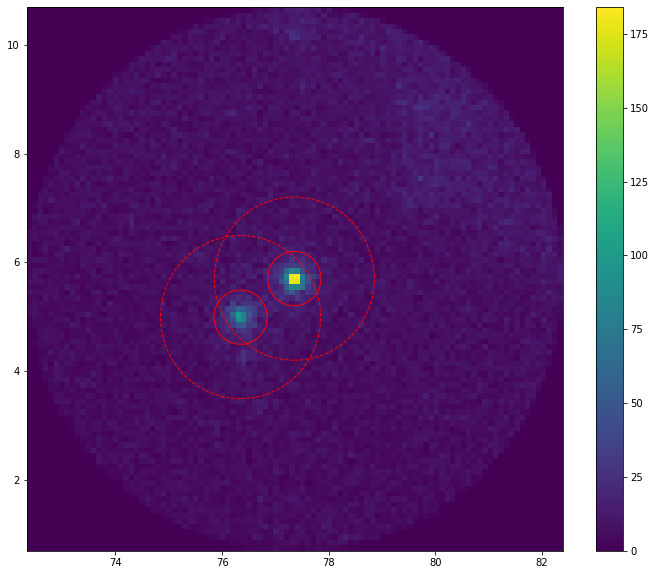

In [6]:
#plot photons
bin_n = 8
%matplotlib inline
plt.figure(figsize = (12,10))
plt.hist2d(np.array(df.loc[df['ENERGY'] > e_cut]['RA']), 
           np.array(df.loc[df['ENERGY'] > e_cut]['DEC']), bins=100)

c_txs1 = patches.Circle((RA_txs, DEC_txs), radius = 0.5, facecolor = 'none', edgecolor = "red")
c_txs2 = patches.Circle((RA_txs, DEC_txs), radius = 1.5, facecolor = 'none', edgecolor = "red", linestyle = '--')
plt.gca().add_artist(c_txs1)
plt.gca().add_artist(c_txs2)

c_pks1 = patches.Circle((RA_pks, DEC_pks), radius = 0.5, facecolor = 'none', edgecolor = "red")
c_pks2 = patches.Circle((RA_pks, DEC_pks), radius = 1.5, facecolor = 'none', edgecolor = "red", linestyle = '--')
plt.gca().add_artist(c_pks1)
plt.gca().add_artist(c_pks2)
plt.colorbar()
plt.show()

Show hints of PSF overlap in the image

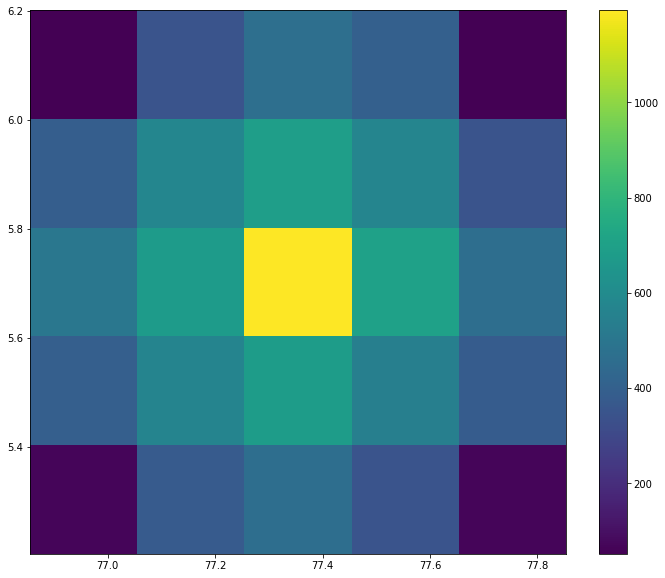

In [7]:
#%matplotlib widget
plt.figure(figsize = (12,10))
plt.hist2d(df.loc[lambda t: np.sqrt((t['RA'] - RA_txs)**2 + (t['DEC'] - DEC_txs)**2) < r]['RA'],
           df.loc[lambda t: np.sqrt((t['RA'] - RA_txs)**2 + (t['DEC'] - DEC_txs)**2) < r]['DEC'], bins = 5)
plt.colorbar()
plt.show()

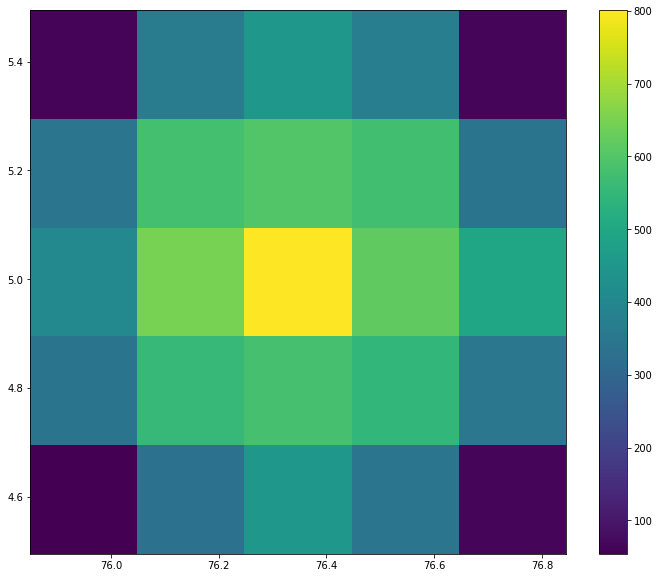

In [8]:
plt.figure(figsize = (12,10))
plt.hist2d(df.loc[lambda t: np.sqrt((t['RA'] - RA_pks)**2 + (t['DEC'] - DEC_pks)**2) < r]['RA'],
           df.loc[lambda t: np.sqrt((t['RA'] - RA_pks)**2 + (t['DEC'] - DEC_pks)**2) < r]['DEC'], bins = 5)
plt.colorbar()
plt.show()

Show a image of the PKS flare

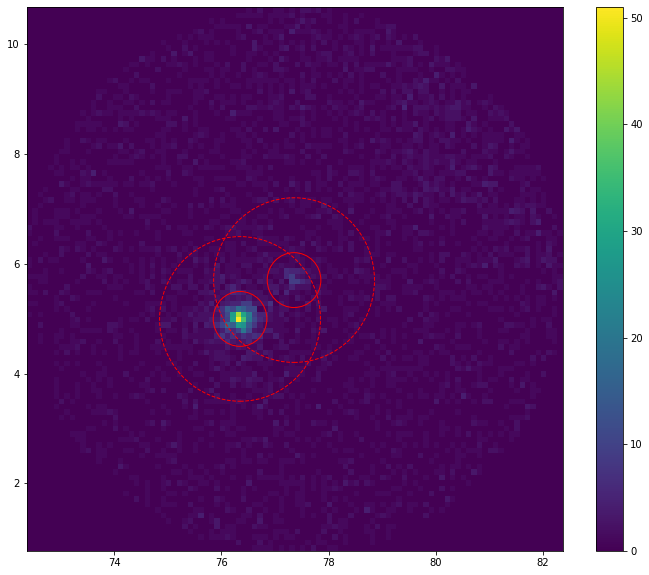

In [9]:
sdf_flare = df[(df['TIME'] < np.datetime64('2015-05-01 00:00:00')) & 
               (df['TIME'] > np.datetime64('2014-05-01 00:00:00'))]
plt.figure(figsize = (12,10))
plt.hist2d(np.array(sdf_flare.loc[df['ENERGY'] > e_cut]['RA']), 
           np.array(sdf_flare.loc[df['ENERGY'] > e_cut]['DEC']), bins=100)

c_txs1 = patches.Circle((RA_txs, DEC_txs), radius = 0.5, facecolor = 'none', edgecolor = "red")
c_txs2 = patches.Circle((RA_txs, DEC_txs), radius = 1.5, facecolor = 'none', edgecolor = "red", linestyle = '--')
plt.gca().add_artist(c_txs1)
plt.gca().add_artist(c_txs2)

c_pks1 = patches.Circle((RA_pks, DEC_pks), radius = 0.5, facecolor = 'none', edgecolor = "red")
c_pks2 = patches.Circle((RA_pks, DEC_pks), radius = 1.5, facecolor = 'none', edgecolor = "red", linestyle = '--')
plt.gca().add_artist(c_pks1)
plt.gca().add_artist(c_pks2)
plt.colorbar()
plt.show()
plt.show()

Show an image of the TXS flare

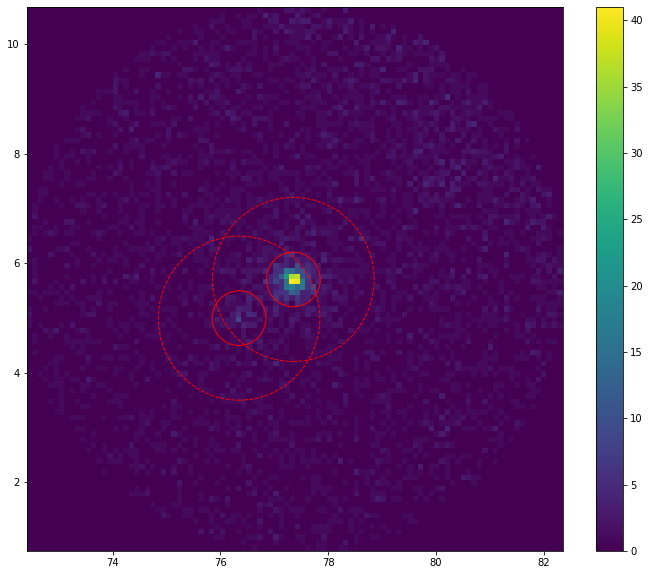

In [10]:
sdf_flare = df[(df['TIME'] < np.datetime64('2018-05-01 00:00:00')) & 
               (df['TIME'] > np.datetime64('2017-05-01 00:00:00'))]
plt.figure(figsize = (12,10))
plt.hist2d(np.array(sdf_flare.loc[df['ENERGY'] > e_cut]['RA']), 
           np.array(sdf_flare.loc[df['ENERGY'] > e_cut]['DEC']), bins=100)

c_txs1 = patches.Circle((RA_txs, DEC_txs), radius = 0.5, facecolor = 'none', edgecolor = "red")
c_txs2 = patches.Circle((RA_txs, DEC_txs), radius = 1.5, facecolor = 'none', edgecolor = "red", linestyle = '--')
plt.gca().add_artist(c_txs1)
plt.gca().add_artist(c_txs2)

c_pks1 = patches.Circle((RA_pks, DEC_pks), radius = 0.5, facecolor = 'none', edgecolor = "red")
c_pks2 = patches.Circle((RA_pks, DEC_pks), radius = 1.5, facecolor = 'none', edgecolor = "red", linestyle = '--')
plt.gca().add_artist(c_pks1)
plt.gca().add_artist(c_pks2)
plt.colorbar()
plt.show()
plt.show()

Look for spectral hardening during a flare

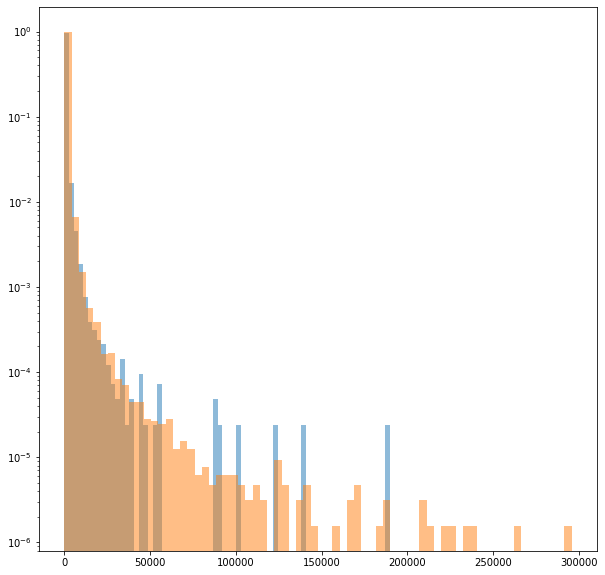

In [11]:
%matplotlib inline
bin_nr = 70
w_flare = np.full(len(sdf_flare), 1/len(sdf_flare))
w_full = np.full(len(df), 1/len(df))
plt.figure(figsize = (10,10))
plt.hist(sdf_flare['ENERGY'], bins=bin_nr, alpha = 0.5, weights = w_flare)
plt.hist(df['ENERGY'], bins=bin_nr, alpha = 0.5, weights = w_full)
#plt.yscale('log')
plt.yscale('log')
plt.show()

Move on to science tools

In [12]:
from GtApp import GtApp
set_name = 'txs'
# create necessary dirs
if not os.path.exists('./output'): 
    os.makedirs('./output')
if not os.path.exists('./output/%s' % set_name):
    os.makedirs('./output/%s' % set_name)

# set up proper binning
bin_mths = 3 # number of months per time bin
ntbins = int((df['TIME'].max() - df['TIME'].min()) / np.timedelta64(1, 'M') / bin_mths) # number of time bins
bin_sec = bin_mths * 2629800 # number of seconds per bin
time_bins = np.zeros((ntbins, 2)) # bin start and end
for i in range(0, ntbins):
    time_bins[i][0] = df['MET'].min() + i * bin_sec
    time_bins[i][1] = df['MET'].min() + (i+1) * bin_sec
   
RA = RA_txs
DEC = DEC_txs

os.system("ls ./data/%s/*PH* > ./data/%s/events.lst" % (set_name, set_name)) 

# make a list of photon files

SCfile = glob("./data/%s/*SC*.fits" % set_name)[0] # find the spacecraft file





In [17]:
import fermitools
fermitools.__file__

'/usr/local/Caskroom/miniforge/base/envs/fermi/lib/python3.7/site-packages/fermitools/__init__.py'

In [15]:

# # select events of interest for each bin
for i in range(ntbins):
    gtselect = GtApp('gtselect')
    gtselect['evclass'] = 128 # photons coming from a source
    gtselect['evtype'] = 3 # photons incident either on the front or the back part of the detector
    gtselect['ra'] = RA
    gtselect['dec'] = DEC
    gtselect['rad'] = 5 # FoV, for a speedup keep at 5 even if you have more data
    gtselect['emin'] = e_cut # lower energy cut
    gtselect['emax'] = 300000 # higher energy cut
    gtselect['zmax'] = 90 # the maximum angle between zenith of LAT and the source
    gtselect['tmin'] = time_bins[i][0]
    gtselect['tmax'] = time_bins[i][1]
    gtselect['infile'] = './data/%s/events.lst' % set_name # input photon file list
    gtselect['outfile'] = './output/%s/%s_filtered_%d.fits' % (set_name, set_name, i) # output file
    gtselect.run(print_command=False)

time -p gtselect infile=./data/txs/events.lst outfile=./output/txs/txs_filtered_0.fits ra=77.3542 dec=5.7025 rad=5.0 tmin=239557432.5243414 tmax=247446832.5243414 emin=1000.0 emax=300000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 1.22
user 0.88
sys 0.05
time -p gtselect infile=./data/txs/events.lst outfile=./output/txs/txs_filtered_1.fits ra=77.3542 dec=5.7025 rad=5.0 tmin=247446832.5243414 tmax=255336232.5243414 emin=1000.0 emax=300000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 0.93
user 0.87
sys 0.04
time -p gtselect infile=./data/txs/events.lst outfile=./output/txs/txs_filtered_2.fits ra=77.3542 dec=5.7025 rad=5.0 tmin=255336232.5243414 tmax=263225632.5243414 emin=1000.0 emax=300000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0

KeyboardInterrupt: 

In [20]:
# find time intervals when the telescope was operating properly
for i in range(ntbins):
    gtmktime = GtApp('gtmktime')
    gtmktime['scfile'] = SCfile
    gtmktime['filter'] = '(DATA_QUAL>0)&&(LAT_CONFIG==1)' # only use good data
    gtmktime['roicut'] = 'no' # remove photons coming from outside region of interest. not important for us
    gtmktime['evfile'] = './output/%s/%s_filtered_%d.fits' % (set_name, set_name, i)
    gtmktime['outfile'] = './output/%s/%s_filtered_gti_%d.fits' % (set_name, set_name, i)
    gtmktime.run(print_command=False)

time -p gtmktime scfile=./data/txs/L221108044435D3DDE47220_SC00.fits sctable="SC_DATA" filter="(DATA_QUAL>0)&&(LAT_CONFIG==1)" roicut=no evfile=./output/txs/txs_filtered_0.fits evtable="EVENTS" outfile="./output/txs/txs_filtered_gti_0.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 6.20
user 1.38
sys 4.15
time -p gtmktime scfile=./data/txs/L221108044435D3DDE47220_SC00.fits sctable="SC_DATA" filter="(DATA_QUAL>0)&&(LAT_CONFIG==1)" roicut=no evfile=./output/txs/txs_filtered_1.fits evtable="EVENTS" outfile="./output/txs/txs_filtered_gti_1.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 5.61
user 1.45
sys 4.03
time -p gtmktime scfile=./data/txs/L221108044435D3DDE47220_SC00.fits sctable="SC_DATA" filter="(DATA_QUAL>0)&&(LAT_CONFIG==1)" roicut=no evfile=./output/txs/txs_filtered_2.fits evtable="

real 6.54
user 2.44
sys 4.08
time -p gtmktime scfile=./data/txs/L221108044435D3DDE47220_SC00.fits sctable="SC_DATA" filter="(DATA_QUAL>0)&&(LAT_CONFIG==1)" roicut=no evfile=./output/txs/txs_filtered_21.fits evtable="EVENTS" outfile="./output/txs/txs_filtered_gti_21.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 6.73
user 2.53
sys 4.16
time -p gtmktime scfile=./data/txs/L221108044435D3DDE47220_SC00.fits sctable="SC_DATA" filter="(DATA_QUAL>0)&&(LAT_CONFIG==1)" roicut=no evfile=./output/txs/txs_filtered_22.fits evtable="EVENTS" outfile="./output/txs/txs_filtered_gti_22.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 6.70
user 2.56
sys 4.11
time -p gtmktime scfile=./data/txs/L221108044435D3DDE47220_SC00.fits sctable="SC_DATA" filter="(DATA_QUAL>0)&&(LAT_CONFIG==1)" roicut=no evfile=./output/

real 8.03
user 3.76
sys 4.22
time -p gtmktime scfile=./data/txs/L221108044435D3DDE47220_SC00.fits sctable="SC_DATA" filter="(DATA_QUAL>0)&&(LAT_CONFIG==1)" roicut=no evfile=./output/txs/txs_filtered_42.fits evtable="EVENTS" outfile="./output/txs/txs_filtered_gti_42.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 7.84
user 3.61
sys 4.19
time -p gtmktime scfile=./data/txs/L221108044435D3DDE47220_SC00.fits sctable="SC_DATA" filter="(DATA_QUAL>0)&&(LAT_CONFIG==1)" roicut=no evfile=./output/txs/txs_filtered_43.fits evtable="EVENTS" outfile="./output/txs/txs_filtered_gti_43.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 7.95
user 3.68
sys 4.20
time -p gtmktime scfile=./data/txs/L221108044435D3DDE47220_SC00.fits sctable="SC_DATA" filter="(DATA_QUAL>0)&&(LAT_CONFIG==1)" roicut=no evfile=./output/

In [21]:
print(ntbins)


49


In [22]:
# create a counts map for every energy bin and every time bin
for i in range(ntbins):
    gtbin = GtApp('gtbin')
    gtbin['algorithm'] = 'CCUBE' # make a counts cube
    gtbin['evfile'] = './output/%s/%s_filtered_gti_%d.fits' % (set_name, set_name, i)
    gtbin['outfile'] = './output/%s/%s_binned_ccube_%d.fits' % (set_name, set_name, i)
    gtbin['scfile'] = 'NONE' # we do not need the spacecraft file here
    gtbin['nxpix'] = 100 # number of RA bins
    gtbin['nypix'] = 100 # number of DEC bins
    gtbin['binsz'] = 0.05 # number of degrees per pixel
    gtbin['coordsys'] = 'CEL' # choose RA and DEC as our coordinates as opposed to galactic coordinates
    gtbin['xref'] = RA
    gtbin['yref'] = DEC
    gtbin['proj'] = 'AIT' # type of projection of the 3D sky on a 2D plane
    gtbin['axisrot'] = 0.0 # no rotation
    gtbin['ebinalg'] = 'LOG' # logarithmic energy binning
    gtbin['enumbins'] = 20 # 20 bins
    gtbin['emin'] = 1000.0 
    gtbin['emax'] = 300000.0
    gtbin.run(print_command=False)
    print('gtbin finished for bin %d' % i)

time -p gtbin evfile=./output/txs/txs_filtered_gti_0.fits scfile=NONE outfile=./output/txs/txs_binned_ccube_0.fits algorithm="CCUBE" ebinalg="LOG" emin=1000.0 emax=300000.0 enumbins=20 denergy=0.0 ebinfile=NONE tbinalg="LIN" tstart=0.0 tstop=0.0 dtime=0.0 tbinfile=NONE snratio=0.0 lcemin=0.0 lcemax=0.0 nxpix=100 nypix=100 binsz=0.05 coordsys="CEL" xref=77.3542 yref=5.7025 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD
gtbin: WARNING: No spacecraft file: EXPOSURE keyword will be set equal to ontime.
real 0.22
user 0.17
sys 0.02
gtbin finished for bin 0
time -p gtbin evfile=./output/txs/txs_filtered_gti_1.fits scfile=NONE outfile=./output/txs/txs_binned_ccube_1.fits algorithm="CCUBE" ebinalg="LOG" emin=1000.0 emax=300000.0 enumbins=20 denergy=0.0 ebinfile=NONE tbinalg="LIN" tstart=

gtbin: WARNING: No spacecraft file: EXPOSURE keyword will be set equal to ontime.
real 0.20
user 0.16
sys 0.02
gtbin finished for bin 10
time -p gtbin evfile=./output/txs/txs_filtered_gti_11.fits scfile=NONE outfile=./output/txs/txs_binned_ccube_11.fits algorithm="CCUBE" ebinalg="LOG" emin=1000.0 emax=300000.0 enumbins=20 denergy=0.0 ebinfile=NONE tbinalg="LIN" tstart=0.0 tstop=0.0 dtime=0.0 tbinfile=NONE snratio=0.0 lcemin=0.0 lcemax=0.0 nxpix=100 nypix=100 binsz=0.05 coordsys="CEL" xref=77.3542 yref=5.7025 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD
gtbin: WARNING: No spacecraft file: EXPOSURE keyword will be set equal to ontime.
real 0.20
user 0.16
sys 0.02
gtbin finished for bin 11
time -p gtbin evfile=./output/txs/txs_filtered_gti_12.fits scfile=NONE outfile=./output/txs/

gtbin: WARNING: No spacecraft file: EXPOSURE keyword will be set equal to ontime.
real 0.20
user 0.17
sys 0.02
gtbin finished for bin 21
time -p gtbin evfile=./output/txs/txs_filtered_gti_22.fits scfile=NONE outfile=./output/txs/txs_binned_ccube_22.fits algorithm="CCUBE" ebinalg="LOG" emin=1000.0 emax=300000.0 enumbins=20 denergy=0.0 ebinfile=NONE tbinalg="LIN" tstart=0.0 tstop=0.0 dtime=0.0 tbinfile=NONE snratio=0.0 lcemin=0.0 lcemax=0.0 nxpix=100 nypix=100 binsz=0.05 coordsys="CEL" xref=77.3542 yref=5.7025 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD
gtbin: WARNING: No spacecraft file: EXPOSURE keyword will be set equal to ontime.
real 0.20
user 0.16
sys 0.02
gtbin finished for bin 22
time -p gtbin evfile=./output/txs/txs_filtered_gti_23.fits scfile=NONE outfile=./output/txs/

gtbin: WARNING: No spacecraft file: EXPOSURE keyword will be set equal to ontime.
real 0.20
user 0.17
sys 0.02
gtbin finished for bin 32
time -p gtbin evfile=./output/txs/txs_filtered_gti_33.fits scfile=NONE outfile=./output/txs/txs_binned_ccube_33.fits algorithm="CCUBE" ebinalg="LOG" emin=1000.0 emax=300000.0 enumbins=20 denergy=0.0 ebinfile=NONE tbinalg="LIN" tstart=0.0 tstop=0.0 dtime=0.0 tbinfile=NONE snratio=0.0 lcemin=0.0 lcemax=0.0 nxpix=100 nypix=100 binsz=0.05 coordsys="CEL" xref=77.3542 yref=5.7025 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD
gtbin: WARNING: No spacecraft file: EXPOSURE keyword will be set equal to ontime.
real 0.20
user 0.17
sys 0.02
gtbin finished for bin 33
time -p gtbin evfile=./output/txs/txs_filtered_gti_34.fits scfile=NONE outfile=./output/txs/

gtbin: WARNING: No spacecraft file: EXPOSURE keyword will be set equal to ontime.
real 0.20
user 0.17
sys 0.02
gtbin finished for bin 43
time -p gtbin evfile=./output/txs/txs_filtered_gti_44.fits scfile=NONE outfile=./output/txs/txs_binned_ccube_44.fits algorithm="CCUBE" ebinalg="LOG" emin=1000.0 emax=300000.0 enumbins=20 denergy=0.0 ebinfile=NONE tbinalg="LIN" tstart=0.0 tstop=0.0 dtime=0.0 tbinfile=NONE snratio=0.0 lcemin=0.0 lcemax=0.0 nxpix=100 nypix=100 binsz=0.05 coordsys="CEL" xref=77.3542 yref=5.7025 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD
gtbin: WARNING: No spacecraft file: EXPOSURE keyword will be set equal to ontime.
real 0.20
user 0.17
sys 0.02
gtbin finished for bin 44
time -p gtbin evfile=./output/txs/txs_filtered_gti_45.fits scfile=NONE outfile=./output/txs/

In [23]:
# calculate total time when the telescope was gathering data in our FoV
for i in range(ntbins):
    gtltcube = GtApp('gtltcube')
    gtltcube['evfile'] = './output/%s/%s_filtered_gti_%d.fits' % (set_name, set_name, i)
    gtltcube['scfile'] = SCfile
    gtltcube['outfile'] = './output/%s/%s_binned_ltCube_%d.fits' % (set_name, set_name, i)
    gtltcube['zmax'] = 90
    gtltcube['dcostheta'] = 0.025
    gtltcube['binsz'] = 1
    gtltcube.run(print_command=False)

time -p gtltcube evfile="./output/txs/txs_filtered_gti_0.fits" evtable="EVENTS" scfile=./data/txs/L221108044435D3DDE47220_SC00.fits sctable="SC_DATA" outfile=./output/txs/txs_binned_ltCube_0.fits dcostheta=0.025 binsz=1.0 phibins=0 tmin=0.0 tmax=0.0 file_version="1" zmin=0.0 zmax=90.0 chatter=2 clobber=yes debug=no gui=no mode="ql"
Working on file ./data/txs/L221108044435D3DDE47220_SC00.fits
.....................!
real 131.30
user 130.44
sys 0.60
time -p gtltcube evfile="./output/txs/txs_filtered_gti_1.fits" evtable="EVENTS" scfile=./data/txs/L221108044435D3DDE47220_SC00.fits sctable="SC_DATA" outfile=./output/txs/txs_binned_ltCube_1.fits dcostheta=0.025 binsz=1.0 phibins=0 tmin=0.0 tmax=0.0 file_version="1" zmin=0.0 zmax=90.0 chatter=2 clobber=yes debug=no gui=no mode="ql"
Working on file ./data/txs/L221108044435D3DDE47220_SC00.fits
.....................!
real 131.26
user 130.56
sys 0.62
time -p gtltcube evfile="./output/txs/txs_filtered_gti_2.fits" evtable="EVENTS" scfile=./data/txs/

Working on file ./data/txs/L221108044435D3DDE47220_SC00.fits
.....................!
real 125.24
user 124.38
sys 0.74
time -p gtltcube evfile="./output/txs/txs_filtered_gti_19.fits" evtable="EVENTS" scfile=./data/txs/L221108044435D3DDE47220_SC00.fits sctable="SC_DATA" outfile=./output/txs/txs_binned_ltCube_19.fits dcostheta=0.025 binsz=1.0 phibins=0 tmin=0.0 tmax=0.0 file_version="1" zmin=0.0 zmax=90.0 chatter=2 clobber=yes debug=no gui=no mode="ql"
Working on file ./data/txs/L221108044435D3DDE47220_SC00.fits
.....................!
real 124.78
user 123.98
sys 0.64
time -p gtltcube evfile="./output/txs/txs_filtered_gti_20.fits" evtable="EVENTS" scfile=./data/txs/L221108044435D3DDE47220_SC00.fits sctable="SC_DATA" outfile=./output/txs/txs_binned_ltCube_20.fits dcostheta=0.025 binsz=1.0 phibins=0 tmin=0.0 tmax=0.0 file_version="1" zmin=0.0 zmax=90.0 chatter=2 clobber=yes debug=no gui=no mode="ql"
Working on file ./data/txs/L221108044435D3DDE47220_SC00.fits
.....................!
real 123.5

.....................!
real 124.58
user 123.78
sys 0.65
time -p gtltcube evfile="./output/txs/txs_filtered_gti_37.fits" evtable="EVENTS" scfile=./data/txs/L221108044435D3DDE47220_SC00.fits sctable="SC_DATA" outfile=./output/txs/txs_binned_ltCube_37.fits dcostheta=0.025 binsz=1.0 phibins=0 tmin=0.0 tmax=0.0 file_version="1" zmin=0.0 zmax=90.0 chatter=2 clobber=yes debug=no gui=no mode="ql"
Working on file ./data/txs/L221108044435D3DDE47220_SC00.fits
.....................!
real 126.59
user 125.71
sys 0.73
time -p gtltcube evfile="./output/txs/txs_filtered_gti_38.fits" evtable="EVENTS" scfile=./data/txs/L221108044435D3DDE47220_SC00.fits sctable="SC_DATA" outfile=./output/txs/txs_binned_ltCube_38.fits dcostheta=0.025 binsz=1.0 phibins=0 tmin=0.0 tmax=0.0 file_version="1" zmin=0.0 zmax=90.0 chatter=2 clobber=yes debug=no gui=no mode="ql"
Working on file ./data/txs/L221108044435D3DDE47220_SC00.fits
.....................!
real 99.34
user 98.66
sys 0.61
time -p gtltcube evfile="./output/txs/tx

In [24]:
# calculate "exposure" for each energy bin
# this "exposure" is livetime convolved with detection efficiency
# this is an all-sky "exposure" cube we will use to avoid potential problems with modeling
for i in range(ntbins):
    gtexpcube = GtApp('gtexpcube2')
    gtexpcube['infile'] = './output/%s/%s_binned_ltCube_%d.fits' % (set_name, set_name, i)
    gtexpcube['cmap'] = './output/%s/%s_binned_ccube_%d.fits' % (set_name, set_name, i)
    gtexpcube['outfile'] = './output/%s/%s_binned_expcube_%d.fits' % (set_name, set_name, i)
    gtexpcube['irfs'] = 'P8R3_SOURCE_V3'
    gtexpcube['nxpix'] = 1800 # important: all sky!
    gtexpcube['nypix'] = 900 # important: all sky!
    gtexpcube['binsz'] = 0.2 # important: all sky!
    gtexpcube['coordsys'] = 'CEL'
    gtexpcube['xref'] = RA
    gtexpcube['yref'] = DEC
    gtexpcube['proj'] = 'AIT'
    gtexpcube['axisrot'] = 0.0
    gtexpcube['ebinalg'] = 'LOG'
    gtexpcube['enumbins'] = 20
    gtexpcube['emin'] = 1000.0 
    gtexpcube['emax'] = 300000.0
    gtexpcube.run(print_command=False)

time -p gtexpcube2 infile=./output/txs/txs_binned_ltCube_0.fits cmap=./output/txs/txs_binned_ccube_0.fits outfile=./output/txs/txs_binned_expcube_0.fits irfs="P8R3_SOURCE_V3" evtype="INDEF" edisp_bins=0 nxpix=1800 nypix=900 binsz=0.2 coordsys="CEL" xref=77.3542 yref=5.7025 axisrot=0.0 proj="AIT" ebinalg="LOG" emin=1000.0 emax=300000.0 enumbins=20 ebinfile="NONE" hpx_ordering_scheme="RING" hpx_order=6 bincalc="EDGE" ignorephi=no thmax=180.0 thmin=0.0 table="EXPOSURE" chatter=2 clobber=yes debug=no mode="ql"
Computing binned exposure map....................!
real 58.61
user 57.73
sys 0.73
time -p gtexpcube2 infile=./output/txs/txs_binned_ltCube_1.fits cmap=./output/txs/txs_binned_ccube_1.fits outfile=./output/txs/txs_binned_expcube_1.fits irfs="P8R3_SOURCE_V3" evtype="INDEF" edisp_bins=0 nxpix=1800 nypix=900 binsz=0.2 coordsys="CEL" xref=77.3542 yref=5.7025 axisrot=0.0 proj="AIT" ebinalg="LOG" emin=1000.0 emax=300000.0 enumbins=20 ebinfile="NONE" hpx_ordering_scheme="RING" hpx_order=6 bi

Computing binned exposure map....................!
real 57.61
user 56.84
sys 0.61
time -p gtexpcube2 infile=./output/txs/txs_binned_ltCube_14.fits cmap=./output/txs/txs_binned_ccube_14.fits outfile=./output/txs/txs_binned_expcube_14.fits irfs="P8R3_SOURCE_V3" evtype="INDEF" edisp_bins=0 nxpix=1800 nypix=900 binsz=0.2 coordsys="CEL" xref=77.3542 yref=5.7025 axisrot=0.0 proj="AIT" ebinalg="LOG" emin=1000.0 emax=300000.0 enumbins=20 ebinfile="NONE" hpx_ordering_scheme="RING" hpx_order=6 bincalc="EDGE" ignorephi=no thmax=180.0 thmin=0.0 table="EXPOSURE" chatter=2 clobber=yes debug=no mode="ql"
Computing binned exposure map....................!
real 239.15
user 57.04
sys 0.60
time -p gtexpcube2 infile=./output/txs/txs_binned_ltCube_15.fits cmap=./output/txs/txs_binned_ccube_15.fits outfile=./output/txs/txs_binned_expcube_15.fits irfs="P8R3_SOURCE_V3" evtype="INDEF" edisp_bins=0 nxpix=1800 nypix=900 binsz=0.2 coordsys="CEL" xref=77.3542 yref=5.7025 axisrot=0.0 proj="AIT" ebinalg="LOG" emin=1

Computing binned exposure map....................!
real 57.31
user 56.67
sys 0.61
time -p gtexpcube2 infile=./output/txs/txs_binned_ltCube_28.fits cmap=./output/txs/txs_binned_ccube_28.fits outfile=./output/txs/txs_binned_expcube_28.fits irfs="P8R3_SOURCE_V3" evtype="INDEF" edisp_bins=0 nxpix=1800 nypix=900 binsz=0.2 coordsys="CEL" xref=77.3542 yref=5.7025 axisrot=0.0 proj="AIT" ebinalg="LOG" emin=1000.0 emax=300000.0 enumbins=20 ebinfile="NONE" hpx_ordering_scheme="RING" hpx_order=6 bincalc="EDGE" ignorephi=no thmax=180.0 thmin=0.0 table="EXPOSURE" chatter=2 clobber=yes debug=no mode="ql"
Computing binned exposure map....................!
real 57.61
user 56.79
sys 0.66
time -p gtexpcube2 infile=./output/txs/txs_binned_ltCube_29.fits cmap=./output/txs/txs_binned_ccube_29.fits outfile=./output/txs/txs_binned_expcube_29.fits irfs="P8R3_SOURCE_V3" evtype="INDEF" edisp_bins=0 nxpix=1800 nypix=900 binsz=0.2 coordsys="CEL" xref=77.3542 yref=5.7025 axisrot=0.0 proj="AIT" ebinalg="LOG" emin=10

Computing binned exposure map....................!
real 57.85
user 57.19
sys 0.60
time -p gtexpcube2 infile=./output/txs/txs_binned_ltCube_42.fits cmap=./output/txs/txs_binned_ccube_42.fits outfile=./output/txs/txs_binned_expcube_42.fits irfs="P8R3_SOURCE_V3" evtype="INDEF" edisp_bins=0 nxpix=1800 nypix=900 binsz=0.2 coordsys="CEL" xref=77.3542 yref=5.7025 axisrot=0.0 proj="AIT" ebinalg="LOG" emin=1000.0 emax=300000.0 enumbins=20 ebinfile="NONE" hpx_ordering_scheme="RING" hpx_order=6 bincalc="EDGE" ignorephi=no thmax=180.0 thmin=0.0 table="EXPOSURE" chatter=2 clobber=yes debug=no mode="ql"
Computing binned exposure map....................!
real 57.37
user 56.68
sys 0.62
time -p gtexpcube2 infile=./output/txs/txs_binned_ltCube_43.fits cmap=./output/txs/txs_binned_ccube_43.fits outfile=./output/txs/txs_binned_expcube_43.fits irfs="P8R3_SOURCE_V3" evtype="INDEF" edisp_bins=0 nxpix=1800 nypix=900 binsz=0.2 coordsys="CEL" xref=77.3542 yref=5.7025 axisrot=0.0 proj="AIT" ebinalg="LOG" emin=10

In [45]:
# make a model using the 4FGL catalog and background models
from make4FGLxml import *
mymodel = srcList('./data/catalog/gll_psc_v26.xml',
                  './output/%s/%s_filtered_gti_%d.fits' % (set_name, set_name, ntbins - 2),
                  './output/%s/%s_model.xml' % (set_name, set_name))
mymodel.makeModel('./data/catalog/gll_iem_v07.fits', 
                  'gll_iem_v07', 
                  './data/catalog/iso_P8R3_SOURCE_V3_v1.txt', 
                  './data//catalog/iso_P8R3_SOURCE_V3_v1.txt')

Creating file and adding sources from 4FGL
Added 82 point sources and 0 extended sources


In [42]:
print(ntbins)

49


In [7]:
ntbins=49

In [ ]:
##calculate expected signal from all the sources
for i in range(ntbins):
    gtsrcmaps = GtApp('gtsrcmaps')
    gtsrcmaps['cmap'] = './output/%s/%s_binned_ccube_%d.fits' % (set_name, set_name, i)
    gtsrcmaps['scfile'] = SCfile
    gtsrcmaps['expcube'] = './output/%s/%s_binned_ltCube_%d.fits' % (set_name, set_name, i)
    gtsrcmaps['bexpmap'] = './output/%s/%s_binned_expcube_%d.fits' % (set_name, set_name, i)
    gtsrcmaps['srcmdl'] = './output/%s/%s_model.xml' % (set_name, set_name)
    gtsrcmaps['outfile'] = './output/%s/%s_binned_srcmap_%d.fits' % (set_name, set_name, i)
    gtsrcmaps.run(print_command=False)

In [13]:
import pyLikelihood
from BinnedAnalysis import *

fluxes_txs = np.zeros(ntbins)
errs_txs = np.zeros(ntbins)
fluxes_pks = np.zeros(ntbins)
errs_pks = np.zeros(ntbins)

for i in range(ntbins):
    obs = BinnedObs(srcMaps = './output/%s/%s_binned_srcmap_%d.fits' % (set_name, set_name, i),
                    binnedExpMap = './output/%s/%s_binned_expcube_%d.fits' % (set_name, set_name, i),
                    expCube = './output/%s/%s_binned_ltCube_%d.fits' % (set_name, set_name, i),
                    irfs = 'P8R3_SOURCE_V3')
    like = BinnedAnalysis(obs,
                          './output/%s/%s_model.xml' % (set_name, set_name), 
                          optimizer='NewMinuit')
    likeobj = pyLike.NewMinuit(like.logLike)
    like.fit(verbosity=0,covar=True,optObject=likeobj)
    
    if likeobj.getRetCode():
        print('WARNING! Fit did not converge for bin %d' % i)
        
    fluxes_txs[i] = like.flux('4FGL J0509.4+0542') #ph/cm^2/s
    fluxes_pks[i] = like.flux("4FGL J0505.3+0459")
    errs_txs[i] = like.fluxError("4FGL J0509.4+0542")
    errs_pks[i] = like.fluxError("4FGL J0505.3+0459")

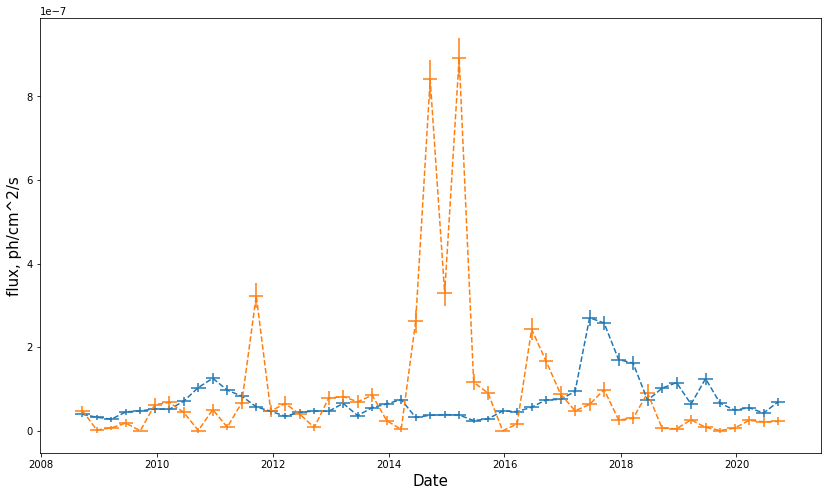

In [14]:
x = np.arange(ntbins)
x_err = np.arange(ntbins)
for i in range(len(x)):
    x[i] = time_bins[i][0] + (time_bins[i][1] - time_bins[i][0]) / 2
    x_err[i] = (time_bins[i][1] - time_bins[i][0]) / 2
x = pd.to_timedelta(x, unit = 's') + start_date
x_err = pd.to_timedelta(x_err, unit = 's')
%matplotlib inline
plt.figure(figsize = (14,8))
plt.errorbar(x, fluxes_txs, xerr = x_err, yerr = errs_txs, linestyle="--")
plt.errorbar(x, fluxes_pks, xerr = x_err, yerr = errs_pks, linestyle="--")
plt.xlabel('Date', fontsize=15)
plt.ylabel('flux, ph/cm^2/s', fontsize=15)
plt.show()